In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df_train_trans=pd.read_csv('../input/transaction_TRAIN.csv') # (161965, 27)
df_train_op=pd.read_csv('../input/operation_TRAIN.csv') # (424481, 20)
df_train_tag=pd.read_csv('../input/tag_TRAIN.csv') # (13422, 2)

In [3]:
df_train_trans.rename(columns=lambda col:'trans_'+col if col!='UID' else col,inplace=True)
df_train_trans.head()

,UID,trans_channel,trans_day,trans_time,trans_trans_amt,trans_amt_src1,trans_merchant,trans_code1,trans_code2,trans_trans_type1,...,trans_ip1,trans_bal,trans_amt_src2,trans_acc_id2,trans_acc_id3,trans_geo_code,trans_trans_type2,trans_market_code,trans_market_type,trans_ip1_sub
0,19092,102,30,11:48:47,1459,acdbdb842ac20f1e,abc6bc660561e0eb,NaN,NaN,26bcf43a19df14c8,...,a664530c1fb20abe,1007,9fefed0a981dcb7a,NaN,NaN,wsbq,102.0,2ecf94369847c748,1.0,45f4ca1f4e9b9cb7
1,13465,140,23,16:58:03,725,4d7831c6f695ab19,7a87b1aa20972d48,NaN,NaN,c2f2023d279665b2,...,52abe1e300a8aa10,100,NaN,NaN,NaN,wte7,105.0,NaN,NaN,2b416f1d7e89ad3b
2,13713,140,22,09:56:39,127,c5fc631370cabc0d,cfd035fc7e0a53b2,NaN,NaN,c2f2023d279665b2,...,e4c132d02ff6c095,100,NaN,NaN,NaN,ws7n,105.0,NaN,NaN,ff71a556d86c4b8f
3,22703,140,1,18:11:45,99317,a571c7fda8b7df37,c71c876b8979028e,NaN,NaN,c2f2023d279665b2,...,e1c78a56cc9dfc8b,100,fbf6bf3c8927414c,NaN,NaN,wqj6,NaN,NaN,NaN,cf1527a0b4173e8f
4,17816,140,22,13:04:02,3361,c5fc631370cabc0d,6628f5ca013e3582,NaN,NaN,c2f2023d279665b2,...,abb6b4b8f15be6d6,100,NaN,NaN,NaN,NaN,105.0,NaN,NaN,cbc62c2b1cb7deb9


In [4]:
df_train_op.rename(columns=lambda col:'op_'+col if col!='UID' else col,inplace=True)
df_train_op.head()

,UID,op_day,op_mode,op_success,op_time,op_os,op_version,op_device1,op_device2,op_device_code1,op_device_code2,op_device_code3,op_mac1,op_mac2,op_ip1,op_ip2,op_wifi,op_geo_code,op_ip1_sub,op_ip2_sub
0,10035,30,c8741ce15ceac2a4,1.0,17:51:50,102,7.0.9,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,00fa2e4ba95605ef,NaN,NaN,a8dc52f65085212e,55dd8936655c86f6,NaN,NaN,wskx,e58e48fb9215116e,NaN
1,16264,16,20a91b45ef8f8221,1.0,08:36:00,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fc7fc47d6c93f554,NaN,NaN,NaN,3502c553ea2ac187
2,13162,8,b668e42707ee9c7b,0.0,18:09:57,102,7.0.5,630a1adff2a87007,MI MAX 2,1da225cb679a37eb,f18538156b8f9b57,NaN,a8dc52f65085212e,NaN,2147d925e7a8ba3c,NaN,NaN,NaN,3591678eca3f7a23,NaN
3,21392,23,c8741ce15ceac2a4,1.0,23:53:49,102,7.0.9,630a1adff2a87007,MI 5X,d0c285513b785609,a7e79e3c2c85c8c7,NaN,NaN,04a2d6c090518faa,c52efc665f0af581,NaN,4ff1553b1c96360e,wm4v,fdb5e20f6a6f2cd7,NaN
4,18599,26,acfaded7e04e7ba0,1.0,11:11:15,102,7.0.0,8399be6b80847240,NaN,27efd832595503f6,b6457e2264266257,NaN,NaN,1ab9dc3eae102aa6,0fe293bea342665a,NaN,NaN,NaN,f5009e2c6c13c80c,NaN


## 交易ip字段统计

In [5]:
df_tag_uids=df_train_tag['UID'] # 标签中的UID都是唯一的
black_uids=df_train_tag[df_train_tag['Tag']==1]['UID']
white_uids=df_train_tag[df_train_tag['Tag']==0]['UID']

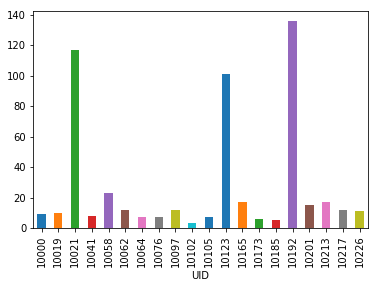

In [6]:
df_train_op[df_train_op['UID'].isin(black_uids)].groupby('UID')['op_ip1_sub'].count()[:20].plot('bar')

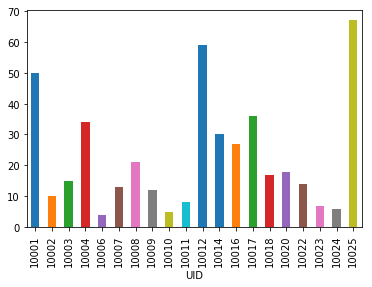

In [7]:
df_train_op[df_train_op['UID'].isin(white_uids)].groupby('UID')['op_ip1_sub'].count()[:20].plot('bar')

## 操作版本号统计

Text(0.5,1,'balck users')

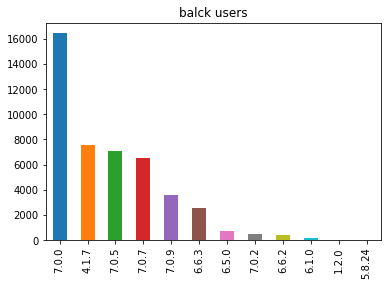

In [21]:
df_train_op[df_train_op['UID'].isin(black_uids)]['op_version'].value_counts().plot('bar')
plt.title("balck users")

In [18]:
df_train_op[df_train_op['UID'].isin(black_uids)]['op_version'].value_counts()[:20]


7.0.0     16453
4.1.7      7518
7.0.5      7084
7.0.7      6526
7.0.9      3542
6.6.3      2550
6.5.0       723
7.0.2       496
6.6.2       386
6.1.0       127
1.2.0        13
5.8.24        9
Name: op_version, dtype: int64

Text(0.5,1,'white users')

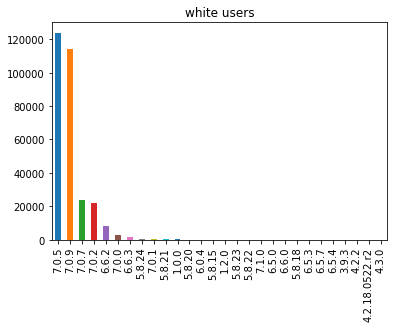

In [22]:
df_train_op[df_train_op['UID'].isin(white_uids)]['op_version'].value_counts().plot('bar')
plt.title("white users")

In [20]:
df_train_op[df_train_op['UID'].isin(white_uids)]['op_version'].value_counts()

7.0.5             123908
7.0.9             114059
7.0.7              23981
7.0.2              21712
6.6.2               8038
7.0.0               2527
6.6.3               1360
5.8.24               369
7.0.1                332
5.8.21               165
1.0.0                108
5.8.20                52
6.0.4                 36
5.8.15                26
1.2.0                 17
5.8.23                14
5.8.22                14
7.1.0                  6
6.5.0                  6
6.6.0                  5
5.8.18                 5
6.5.3                  4
6.5.7                  3
6.5.4                  3
3.9.3                  2
4.2.2                  1
4.2.18.0522.r2         1
4.3.0                  1
Name: op_version, dtype: int64

从上图可以看出，羊毛党喜欢使用低版本的客户端，白用户喜欢使用高版本的客户端,这是一个区别性比较大的特征

In [10]:
op_versions=dict(df_train_op['op_version'].value_counts()).keys()
op_versions=list(op_versions)
op_versions

['7.0.5',
 '7.0.9',
 '7.0.7',
 '7.0.2',
 '7.0.0',
 '6.6.2',
 '4.1.7',
 '6.6.3',
 '6.5.0',
 '5.8.24',
 '7.0.1',
 '5.8.21',
 '6.1.0',
 '1.0.0',
 '5.8.20',
 '6.0.4',
 '1.2.0',
 '5.8.15',
 '5.8.23',
 '5.8.22',
 '7.1.0',
 '6.6.0',
 '5.8.18',
 '6.5.3',
 '6.5.7',
 '6.5.4',
 '3.9.3',
 '4.2.2',
 '4.2.18.0522.r2',
 '4.3.0']

## 构建特征1

In [11]:
uid_op_ver=df_train_op[df_train_op['UID'].isin(df_tag_uids)].groupby('UID')['op_version']
uid_op_ver.value_counts()[:10]

UID    op_version
10000  7.0.7          5
       7.0.5          4
10001  6.6.2         48
10002  7.0.9         10
10003  7.0.9         15
10004  7.0.5         20
       7.0.9         14
10006  7.0.2          4
10007  7.0.9         13
10008  7.0.9         18
Name: op_version, dtype: int64

In [12]:
uid_op_ver.value_counts()[:10].index.tolist()

[(10000, '7.0.7'),
 (10000, '7.0.5'),
 (10001, '6.6.2'),
 (10002, '7.0.9'),
 (10003, '7.0.9'),
 (10004, '7.0.5'),
 (10004, '7.0.9'),
 (10006, '7.0.2'),
 (10007, '7.0.9'),
 (10008, '7.0.9')]

In [13]:
op_versions.sort()
index=range(len(op_versions))
ver_index=dict(zip(op_versions,index))
ver_index

{'1.0.0': 0,
 '1.2.0': 1,
 '3.9.3': 2,
 '4.1.7': 3,
 '4.2.18.0522.r2': 4,
 '4.2.2': 5,
 '4.3.0': 6,
 '5.8.15': 7,
 '5.8.18': 8,
 '5.8.20': 9,
 '5.8.21': 10,
 '5.8.22': 11,
 '5.8.23': 12,
 '5.8.24': 13,
 '6.0.4': 14,
 '6.1.0': 15,
 '6.5.0': 16,
 '6.5.3': 17,
 '6.5.4': 18,
 '6.5.7': 19,
 '6.6.0': 20,
 '6.6.2': 21,
 '6.6.3': 22,
 '7.0.0': 23,
 '7.0.1': 24,
 '7.0.2': 25,
 '7.0.5': 26,
 '7.0.7': 27,
 '7.0.9': 28,
 '7.1.0': 29}

In [16]:
# 此种范式构建特征行不通，sklearn不能接受既有数值又有数组的数据
# import numpy as np
# uid_op_ver=df_train_op[df_train_op['UID'].isin(df_tag_uids)]
# all_vers=[]
# for uid in df_tag_uids:
#     ver_arr=np.zeros(30)
#     ver=dict(uid_op_ver[uid_op_ver['UID']==uid]['op_version'].value_counts())
#     for key,value in ver.items():
#         index=ver_index[key]
#         ver_arr[index]=value
#     all_vers.append(ver_arr)
# df_train_tag['op_version']=all_vers
# df_train_tag.head()

## 构建特征2
因为版本号高低可能是一个比较明显的特征，我们将其转为数值，
- 求下每个用户的版本号平均值，
- 选取每个用户使用频率比较高的版本号作为特征

In [37]:
uid_op_ver=df_train_op[df_train_op['UID'].isin(black_uids)].groupby('UID')['op_version']
uid_op_ver.value_counts()[:20]

UID    op_version
10000  7.0.7          5
       7.0.5          4
10019  7.0.5          5
       7.0.7          5
10021  7.0.0         75
       4.1.7         42
10041  7.0.5          8
10058  7.0.7         12
       7.0.5         11
10062  7.0.5          7
       7.0.0          4
       6.1.0          1
10064  7.0.0          7
10076  7.0.7          7
10097  7.0.5         12
10102  7.0.5          3
10105  7.0.9          7
10123  7.0.0         68
       4.1.7         33
10165  7.0.5         17
Name: op_version, dtype: int64

In [46]:
df_train_op[df_train_op['UID'].isin(black_uids)]['op_version'].count()

45427

In [48]:
df_train_op[df_train_op['UID'].isin(black_uids)]['op_version'].shape

(63520,)